In [1]:
import main

[nltk_data] Downloading package punkt to /home/avivace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/avivace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/avivace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /home/avivace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = main.load_initial_dataset()

Trying to load the cached dataframe...
No cached dataframe, loading the dataset from disk
Caching the dataframe


In [3]:
import numpy as np
import pandas as pd
from pandas import Grouper

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style(style="darkgrid")
from pathlib import Path
from matplotlib import rcParams

# Default text styling for figures
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Inter']
rcParams['font.weight'] = 500
rcParams['xtick.labelsize'] = 17
rcParams['ytick.labelsize'] = 17

figOutputPath = Path("../figures/")

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

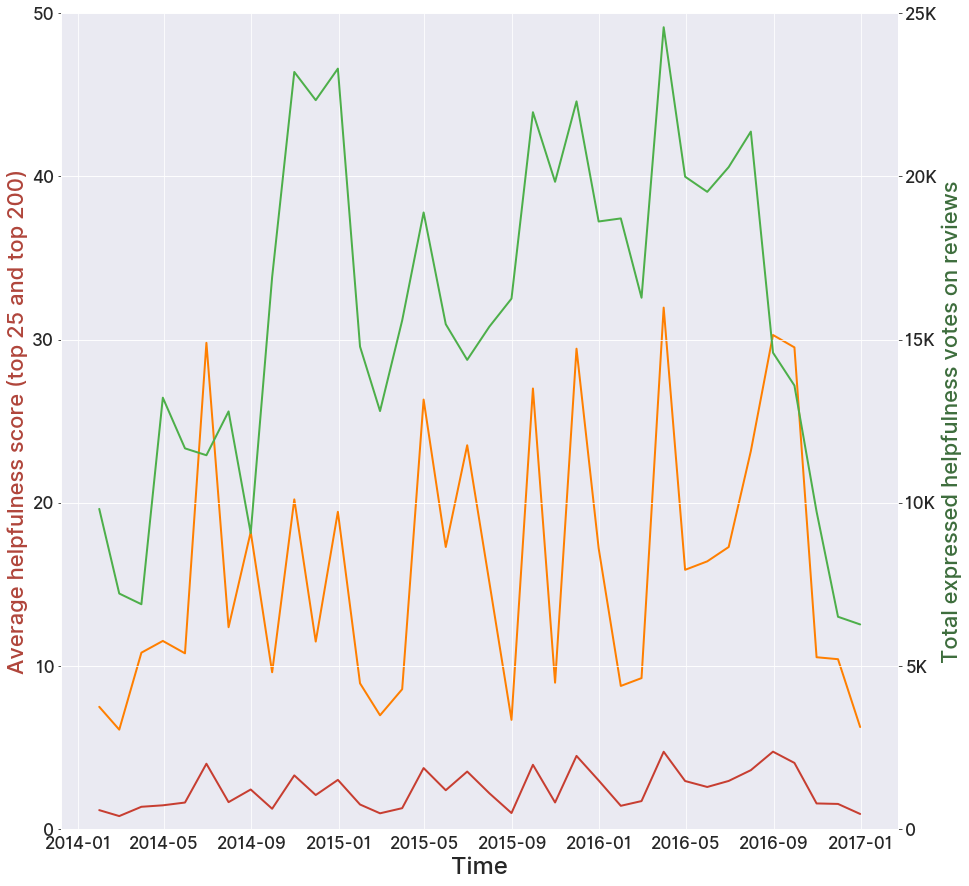

In [37]:
# Time series Figure 1b: Reviews helpfullnes over time and vote use

# Reset the figure
fig, ax1 = plt.subplots(figsize=(15, 15))

# Parse the UNIX datestamp
df.unixReviewTime = pd.to_datetime(df.unixReviewTime, unit='s')

# Order by helpfulness vote
df = df.sort_values("vote",ascending=False)

# Limit our time series to 2014-2016 
df2 = df[(df['unixReviewTime'] > '2014-1-1') & (df['unixReviewTime'] <= '2016-12-31')]

# Group by Month
timegrouped = df2.groupby(Grouper(key='unixReviewTime', freq='1M'))

# List resulting groups
# grouped_df.groups.keys()

# Cumulative sum reviews during time
timegrouped.size().cumsum().reset_index(name="Count").set_index('unixReviewTime')

# Keep the 25 most helpful reviews per each period of time (1M)
top25time = timegrouped.head(25)
top200time = timegrouped.head(200)

# Regroup
top25time = top25time.groupby(Grouper(key='unixReviewTime', freq='1M'))
top200time = top200time.groupby(Grouper(key='unixReviewTime', freq='1M'))

# Plot the mean of helpfulness score on each period
color = 'tab:red'
ax1.set_xlabel('Time', size=24, fontweight=500)
ax1.set_ylabel('Average helpfulness score (top 25 and top 200)', color="#B0453B", size=22, fontweight=500)

# Plot 1: Average 'vote' score of the top 25 reviews
ax1.plot(top25time["vote"].mean(), color="#FF7F00",linewidth=2.0)

ax3 = ax1.twinx()
ax1.plot(top200time["vote"].mean(), color="#C73E31",linewidth=2.0)

# We're plotting in the same time series
ax2 = ax1.twinx()

# Plot 2: Total amount of casted votes on reviews
ax2.plot(timegrouped["vote"].sum(), color="#4DAF4A", linewidth=2.0)

# Style the figure and tune the axis ranges
ax1.set_ylim([0,50])
ax2.set_ylim([0,25000])
ax2.set_ylabel('Total expressed helpfulness votes on reviews', color="#3D6D3C", size=22, fontweight=500)
ax2.set_yticks([0, 5000, 10000, 15000,20000,25000])
ax2.set_yticklabels(["0", "5K", "10K", "15K", "20K", "25K"])
ax3.set_yticks([])

# Set title
#ax1.set_title('Average "helpfulness" of 25 and 200 most relevant reviews over time and traffic', fontsize=23, fontweight=500, pad=32)

ax1.figure.savefig(figOutputPath / '1_avg_help_25_100_traffic.svg', format='svg')

Text(0.5, 1.0, 'Verified/Unverified reviews over time and traffic')

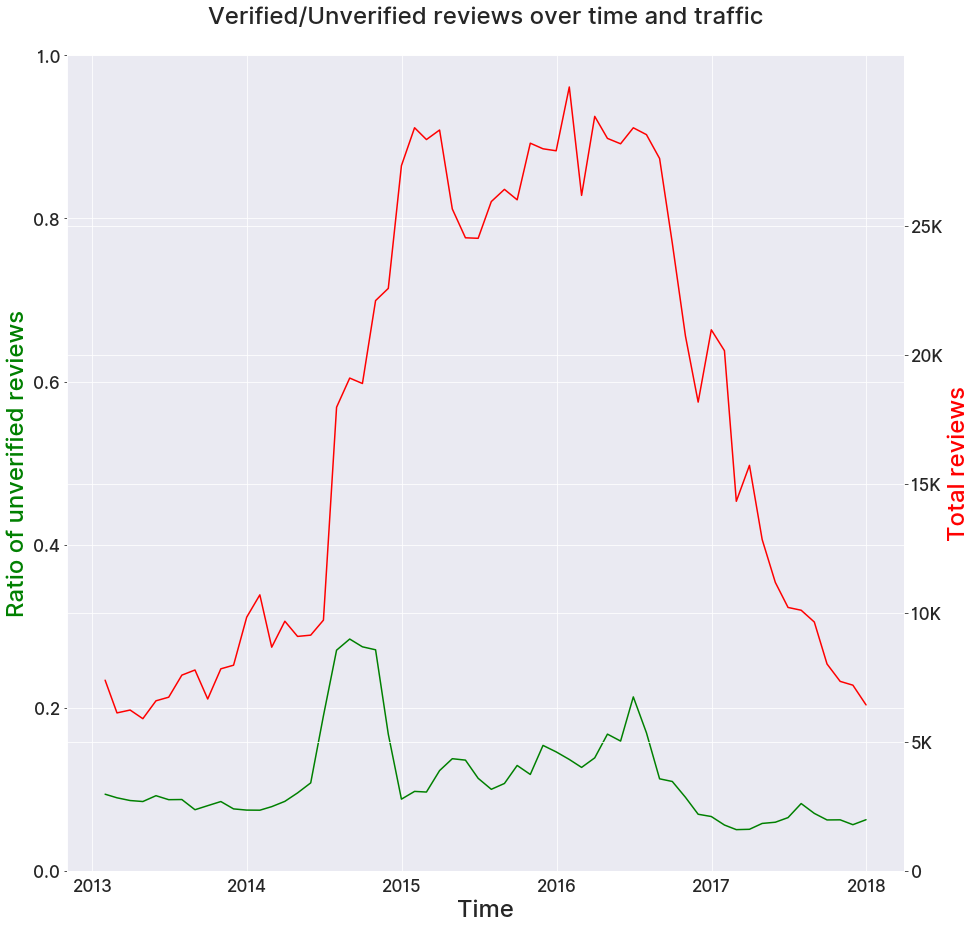

In [30]:
# Time series Figure 2:

# Reset the figure
fig, ax1 = plt.subplots(figsize=(15, 15))

# Limit our time series to 2013-2017
df2 = df[(df['unixReviewTime'] > '2013-1-1') & (df['unixReviewTime'] <= '2017-12-31')]

# Get and group the unverified reviews
timegroupedF = df2.loc[df2['verified']==False].groupby(Grouper(key='unixReviewTime', freq='1M'))

# Get and group every review
timegroupedT = df2.groupby(Grouper(key='unixReviewTime', freq='1M'))

# Compute and plot Unverified / Total Ratio (Time Series)
ax1.plot(timegroupedF.size() / timegroupedT.size(), color="green")

# We're plotting in the same time series
ax2 = ax1.twinx()

# Plot total amount of Reviews, per month
ax2.plot(timegroupedT.size(), color="red")

# Style the figure and tune the axis ranges
ax2.set_yticks([0, 5000, 10000, 15000,20000,25000])
ax2.set_yticklabels(["0", "5K", "10K", "15K", "20K", "25K"])
ax1.set_ylim([0,1])
ax2.set_ylabel('Total reviews', color="red", size=24, fontweight=500)
ax1.set_ylabel('Ratio of unverified reviews', color="green", size=24, fontweight=500)
ax1.set_xlabel('Time', size=24, fontweight=500)

# Set title
ax1.set_title('Verified - Unverified reviews over time and traffic', fontsize=24, fontweight=500, pad=32)

/home/avivace/github/reviews-sentiment/scripts/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Average reviews length VS overall score over time')

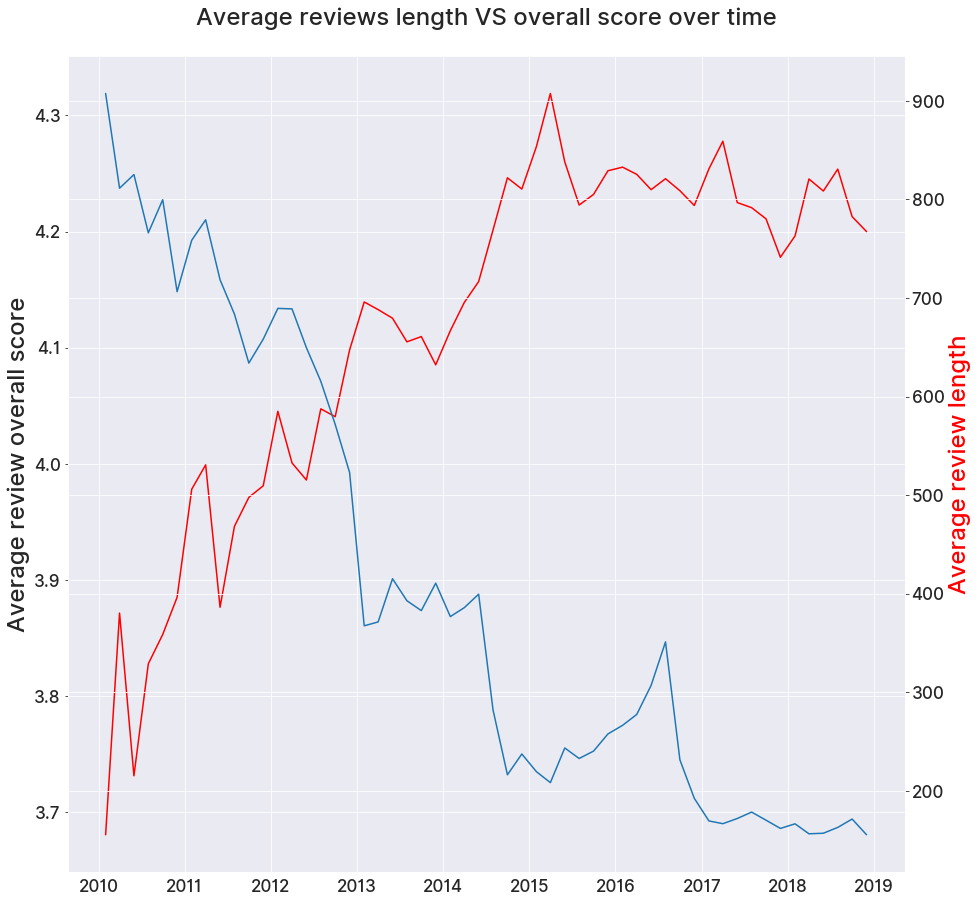

In [31]:
# Time series Figure 3:

# Reset the figure
fig, ax1 = plt.subplots(figsize=(15, 15))

# Limit our time series to 2010-2018
df2 = df[(df['unixReviewTime'] > '2010-1-1') & (df['unixReviewTime'] <= '2018-12-31')]

# Compute the review length
df2['rewlen'] = df2['reviewText'].apply(lambda x: len(x))

# Group by 2 months
df2 = df2.groupby(Grouper(key='unixReviewTime', freq='2M'))

# Plot the mean of review overall score per group (2 months)
ax1.plot(df2["overall"].mean(), color="red")

# We're plotting in the same time series
ax2 = ax1.twinx()

# Plot the mean of review length per group (2 months)
ax2.plot(df2['rewlen'].mean())

# Style the figure and tune the axis ranges
ax2.set_ylabel('Average review length', color="red", size=24, fontweight=500)
ax1.set_ylabel('Average review overall score', size=24, fontweight=500)

# Set title
ax1.set_title('Review length VS overall score over time', fontsize=24, fontweight=500, pad=32)

/home/avivace/github/reviews-sentiment/scripts/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Review length VS overall score over time')

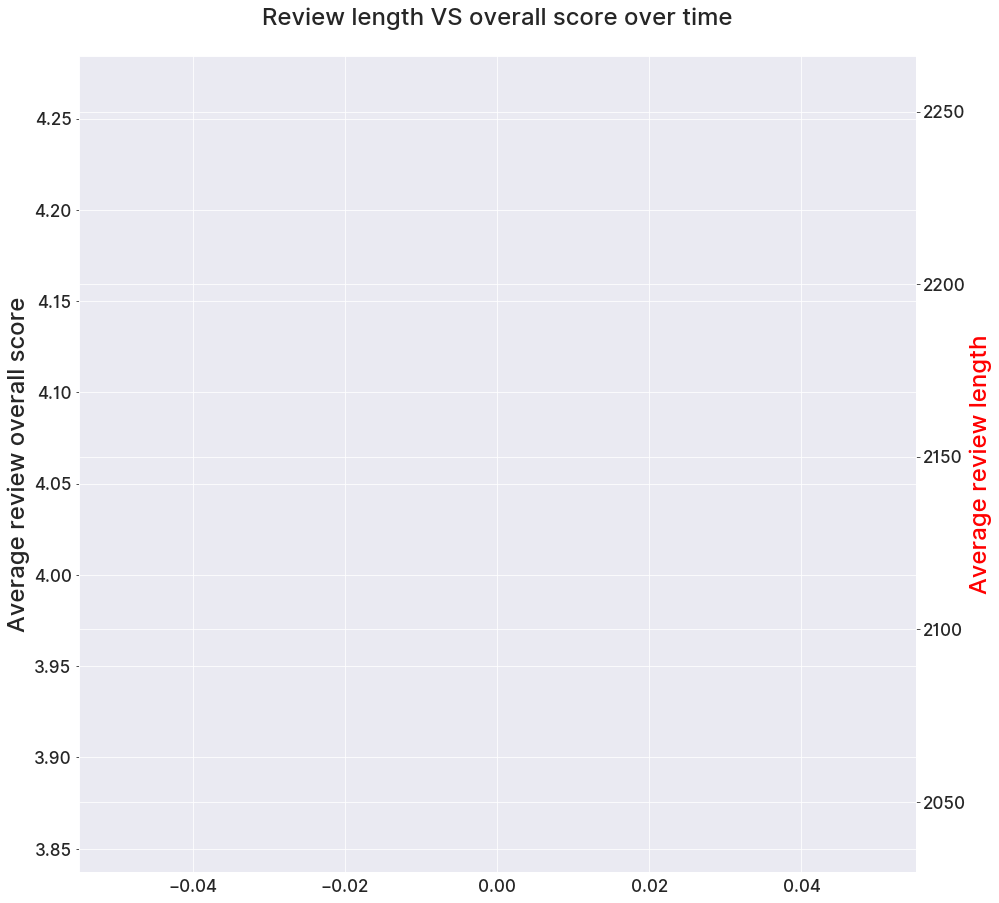

In [51]:
# Time series Figure 4: (FIXME)

# Reset the figure
fig, ax1 = plt.subplots(figsize=(15, 15))

# Limit our time series to 2010-2018
df2 = df[(df['unixReviewTime'] > '2010-1-1') & (df['unixReviewTime'] <= '2018-12-31')]

# Compute the review length
df2['rewlen'] = df2['reviewText'].apply(lambda x: len(x))

# Sort per usefulness score
df2 = df2.sort_values("vote",ascending=False)

# Group by 2 months
df2 = df2.groupby(Grouper(key='unixReviewTime', freq='1M'))
df2 = df2.apply(lambda x: x.nlargest(25, "vote")).reset_index(drop=True)

#df2 = df2.head(25)

# Plot the mean of review overall score per group (2 months)
ax1.plot(df2["overall"].mean(), color="red")

# We're plotting in the same time series
ax2 = ax1.twinx()

# Plot the mean of review length per group (2 months)
ax2.plot(df2['rewlen'].mean())

# Style the figure and tune the axis ranges
ax2.set_ylabel('Average review length', color="red", size=24, fontweight=500)
ax1.set_ylabel('Average review overall score', size=24, fontweight=500)

# Set title
ax1.set_title('Review length VS overall score over time', fontsize=24, fontweight=500, pad=32)